Plots adversary win rate at varying board sizes.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

import utils

plt.style.use(
    ["tableau-colorblind10", utils.get_style("default"), utils.get_style("2-col")]
)

In [2]:
def plot_win_rate_by_board_size(
    df: pd.DataFrame, victim_label: str
) -> Tuple[matplotlib.figure.Figure, matplotlib.axes.Axes]:
    """Plot win rate vs. varying board size.

    Args:
        df: Dataframe of games.
        victim_label: The label to give the victim on the plot.
    """
    print("Win rate:")
    win_proportions = (
        df.groupby(["adv_color", "board_size"]).mean(numeric_only=True).adv_win
    )
    win_rates = 100 * win_proportions
    print(win_rates)

    fig, ax = plt.subplots(1, 1)
    win_rates["b"].plot(label="adv. = black", zorder=10, linestyle="--")
    win_rates["w"].plot(label="adv. = white")
    plt.ylim(-5, 105)
    ax.minorticks_on()
    plt.ylabel(f"Adv. win \\% vs. {victim_label}")
    plt.xlabel("Board size")
    ax.legend()
    return fig, ax

In [3]:
df = utils.parse_sgfs(["/nas/ucb/k8/go-attack/match/ttseng-s34m-bsz-sweep-20230124"])

Win rate:
adv_color  board_size
b          7              31.0
           8              23.0
           9              84.0
           10             99.0
           11             99.0
           12            100.0
           13            100.0
           14            100.0
           15            100.0
           16            100.0
           17            100.0
           18             99.0
           19            100.0
w          7             100.0
           8             100.0
           9             100.0
           10            100.0
           11            100.0
           12            100.0
           13            100.0
           14            100.0
           15            100.0
           16            100.0
           17            100.0
           18            100.0
           19            100.0
Name: adv_win, dtype: float64


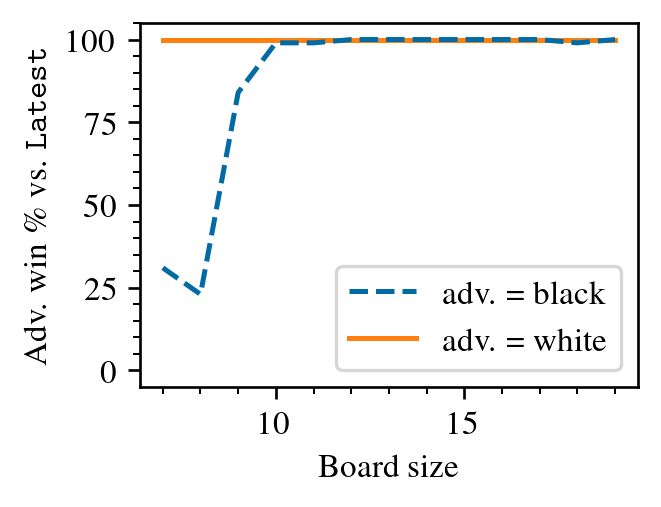

In [4]:
fig, _ = plot_win_rate_by_board_size(df, r"$\texttt{Latest}$")
fig.savefig("win-rate-vs-board-size-s34m.pgf", backend="pgf")

In [5]:
df = utils.parse_sgfs(
    ["/nas/ucb/k8/go-attack/match/ttseng-hard-s545m-bsz-sweep-20221206"]
)
df = df.query("adv_name.str.contains('v600')")

Win rate:
adv_color  board_size
b          7              98.0
           8               0.0
           9               0.0
           10              0.0
           11              0.0
           12             52.0
           13             58.0
           14             76.0
           15             96.0
           16             90.0
           17             94.0
           18             94.0
           19            100.0
w          7               0.0
           8               0.0
           9               0.0
           10              0.0
           11              0.0
           12             56.0
           13             68.0
           14             76.0
           15             84.0
           16            100.0
           17             96.0
           18             94.0
           19             94.0
Name: adv_win, dtype: float64


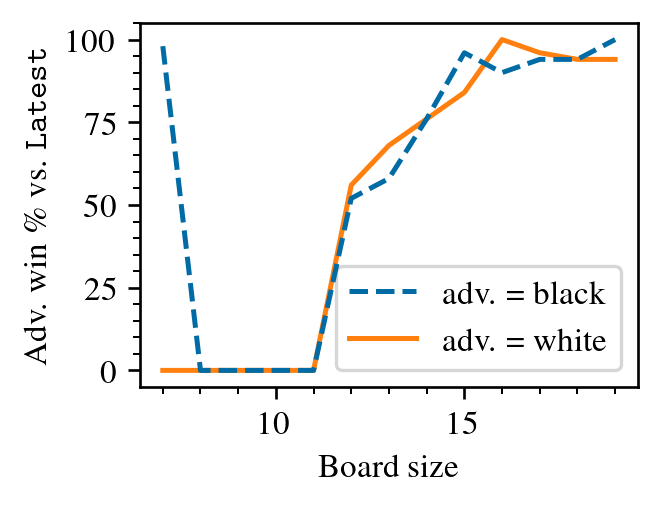

In [6]:
fig, _ = plot_win_rate_by_board_size(df, r"$\texttt{Latest}$")
fig.savefig("win-rate-vs-board-size-s545m.pgf", backend="pgf")